In [501]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams["figure.figsize"] = (20,8)

In [2]:
chron = pd.read_csv("datado2019WHO.csv")

In [219]:
he = pd.read_csv("healt_exp_GDP.csv")

In [266]:
he_pc = pd.read_csv("healt_expenditure2018_percapita.csv")

In [7]:
chron.rename(columns=chron.iloc[0])
new_header = chron.iloc[0] #grab the first row for the header
chron = chron[1:] #take the data less the header row
chron.columns = new_header #set the header row as the df header
#chron.head()

In [11]:
chron.columns = ['Country', 'Year', 'Both','Male','Female']
chron["Both_sex"] = chron["Both"].str[0:4]
chron["Both_sex"] = chron["Both_sex"].astype(float)

,Country,Year,Both,Male,Female,Both_sex
1,Afghanistan,2019,67.7 [33.4-121.2],71.3 [36.2-125.7],64.4 [30.9-117.2],67.7
2,Afghanistan,2018,67.7 [33.2-121.8],71.2 [36.0-126.0],64.4 [30.7-117.9],67.7
3,Afghanistan,2017,67.9 [32.9-123.2],71.6 [35.6-128.0],64.4 [30.4-118.7],67.9
4,Afghanistan,2016,68.8 [33.0-125.6],72.0 [35.5-129.7],65.8 [30.7-121.9],68.8
5,Afghanistan,2015,69.5 [33.2-127.8],72.7 [35.7-131.6],66.6 [30.9-124.3],69.5


In [13]:
chron = chron.sort_values(by = ['Country', 'Year'])

In [15]:
slo = chron[chron.Country == "Slovenia"]

In [221]:
he.rename(columns=chron.iloc[0])
new_header = he.iloc[0] #grab the first row for the header
he = he[1:] #take the data less the header row
he.columns = new_header #set the header row as the df header

In [267]:
he_pc.rename(columns=chron.iloc[0])
new_header = he_pc.iloc[0] #grab the first row for the header
he_pc = he_pc[1:] #take the data less the header row
he_pc.columns = new_header #set the header row as the df header

In [325]:
chron

,Country,Year,Both,Male,Female,Both_sex
20,Afghanistan,2000,72.0 [32.3-140.8],74.0 [34.6-140.6],69.9 [29.9-141.0],72.0
19,Afghanistan,2001,71.7 [32.5-138.7],73.7 [34.7-139.0],69.5 [30.1-138.5],71.7
18,Afghanistan,2002,72.0 [32.4-140.2],74.1 [34.6-140.8],69.9 [30.2-139.5],72.0
17,Afghanistan,2003,72.5 [32.4-141.6],74.6 [34.6-142.4],70.3 [30.2-140.8],72.5
16,Afghanistan,2004,72.9 [32.7-141.6],75.0 [34.9-142.4],70.7 [30.6-140.7],72.9
...,...,...,...,...,...,...
3645,Zimbabwe,2015,65.2 [33.2-116.1],72.5 [37.5-128.9],59.4 [29.8-106.2],65.2
3644,Zimbabwe,2016,64.5 [32.6-115.4],71.7 [36.8-128.1],58.9 [29.4-105.6],64.5
3643,Zimbabwe,2017,63.3 [32.1-113.1],70.6 [36.3-126.0],57.5 [28.8-103.0],63.3
3642,Zimbabwe,2018,63.1 [31.9-113.0],70.4 [36.1-125.8],57.3 [28.6-102.8],63.1


In [223]:
slo_he = he[he.Country == "Slovenia"]

In [269]:
he_pc = he_pc[he_pc.Country == "Slovenia"]

In [270]:
he_pc.head()

,Country,2018.0,2017.0,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0,2010.0,2009.0,2008.0,2007.0,2006.0,2005.0,2004.0,2003.0,2002.0,2001.0,2000.0
158,Slovenia,3158.39,2960.59,2815.52,2689.42,2625.7,2621.22,2533.16,2472.9,2385.06,2360.88,2338.1,2076.87,2013.6,1910.0,1806.0,1708.56,1624.02,1494.46,1405.85


In [27]:
year = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2002", "2014", "2015", "2016", "2017", "2018"]

In [44]:
#df_try=slo_he[slo_he.Country == "Slovenia"]
#slo_he.append([df_try]*21,ignore_index=True)
#slo_he["Year"] = pd.Series(year)

In [225]:
slo_he = slo_he.T

In [271]:
he_pc = he_pc.T

In [226]:
slo_he.rename(columns=chron.iloc[0])
new_header = slo_he.iloc[0] #grab the first row for the header
slo_he = slo_he[1:] #take the data less the header row
slo_he.columns = new_header #set the header row as the df header

In [276]:
he_pc.rename(columns=chron.iloc[0])
new_header = he_pc.iloc[0] #grab the first row for the header
he_pc = he_pc[1:] #take the data less the header row
he_pc.columns = new_header #set the header row as the df header

In [90]:
for col in slo_he.columns: 
    print(col) 

Slovenia


In [282]:
he_pc = he_pc.reset_index()
#slo_he = slo_he.reset_index()
#slo = slo.reset_index()

In [278]:
#slo_he.columns = ["Year", "Health_exp_as_GDP"]
he_pc.columns = ["Year", "Health_exp_per_capita"]

In [280]:
#slo_he = slo_he.sort_values(by = ['Year'])
he_pc = he_pc.sort_values(by = ['Year'])

In [244]:
new_row = {'Year':2019, 'Health_exp_as_GDP':8.24}
#append row to the dataframe
slo_he = slo_he.append(new_row, ignore_index=True)

In [290]:
new_row = {'Year':2019, 'Health_exp_per_capita':3189.28}
#append row to the dataframe
he_pc = he_pc.append(new_row, ignore_index=True)

In [297]:
#slo_he = slo_he.astype({"Year": int, "Health_exp_as_GDP": float})
#he_pc = he_pc.astype({"Year": int, "Health_exp_per_capita": float})
#slo = slo.astype({"Year": int})
#he_pc.dtypes
#slo_he = slo_he.drop(['index'], axis = 1) 
#slo = slo.drop(['index'], axis = 1) 
#he_pc = he_pc.drop(['index'], axis = 1) 
#he_pc

Year                       int64
Health_exp_per_capita    float64
dtype: object

In [303]:
#Vpliv vlaganja v zdravstveni sistem (Health expenditure per capita in $ for Slovenia) na 
#prezgodnje smrti zaradi kroničnih obolenj (Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%))

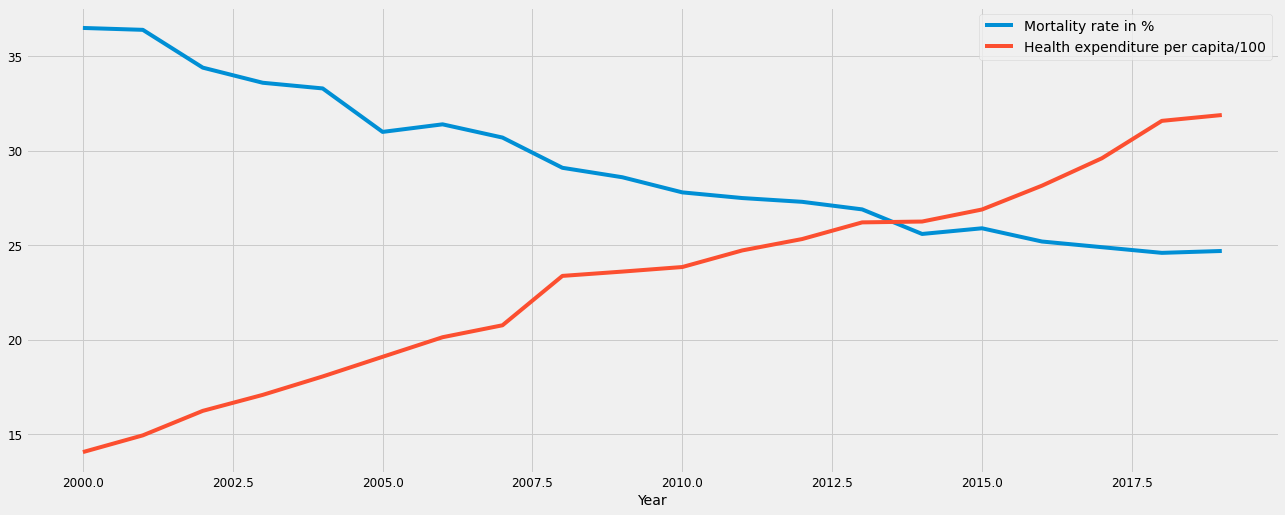

In [318]:
plt.plot(slo.Year, slo.Both_sex)
plt.plot(he_pc.Year, he_pc.Health_exp_per_capita/100)
plt.legend(["Mortality rate in %", "Health expenditure per capita/100"])
plt.xlabel("Year")
plt.show()

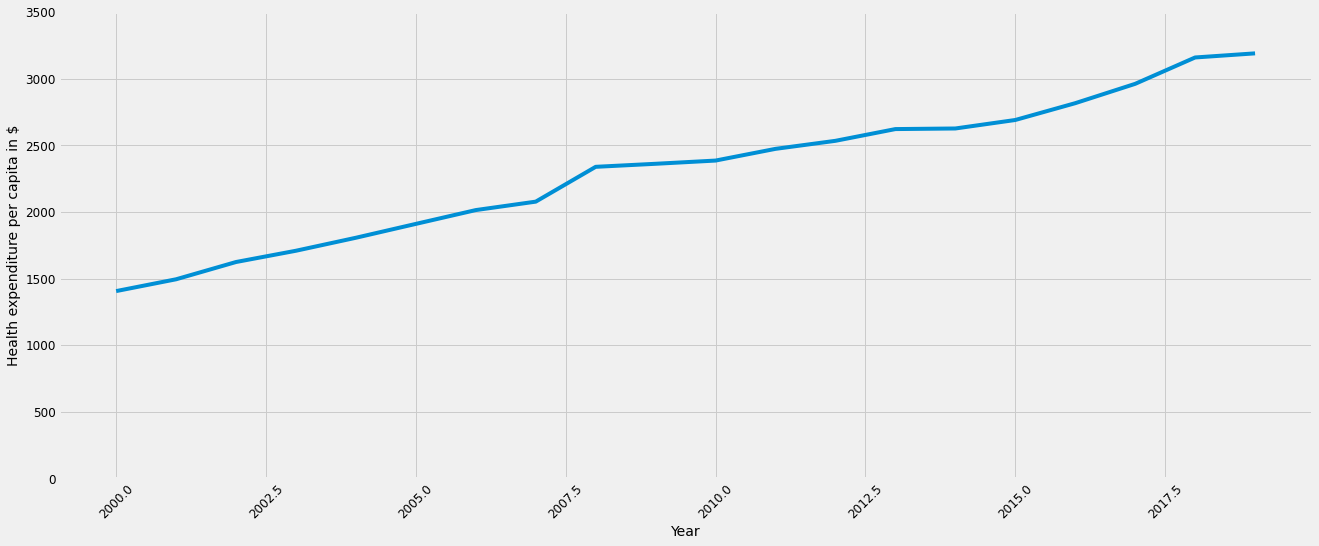

In [313]:
plt.plot(he_pc.Year, he_pc.Health_exp_per_capita)
plt.xlabel("Year")
plt.ylabel("Health expenditure per capita in $")
plt.xticks(rotation=45)
plt.ylim([0,3500])
plt.show()

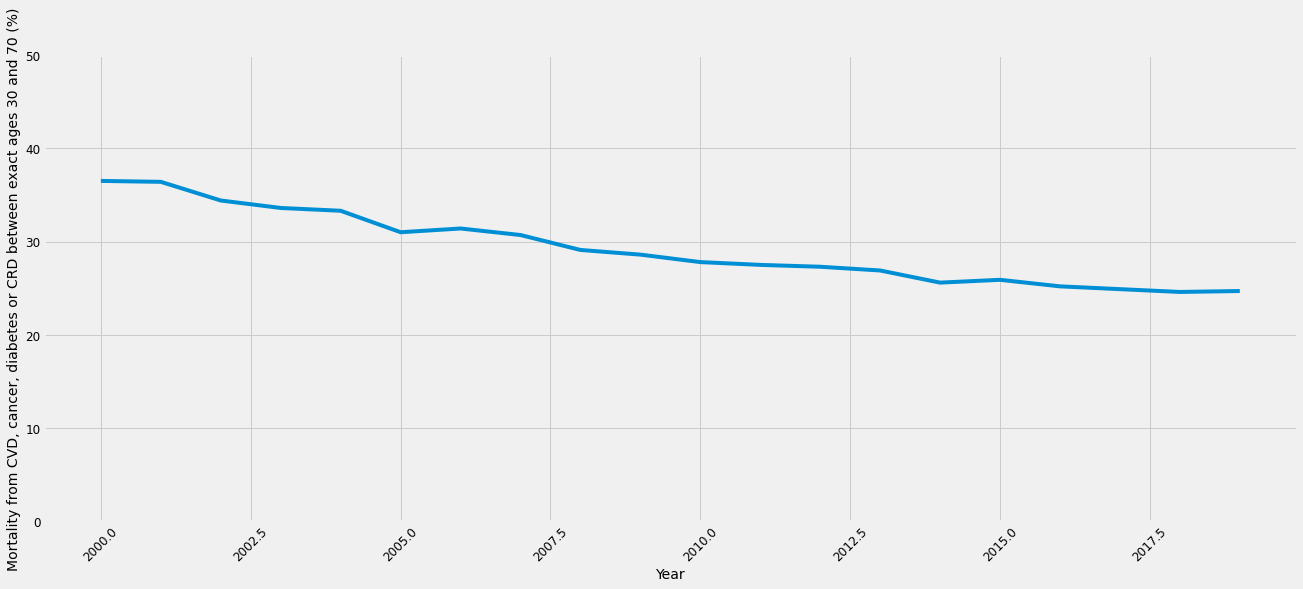

In [312]:
plt.plot(slo.Year, slo.Both_sex)
plt.xlabel("Year")
plt.ylabel("Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)")
plt.ylim([0,50])
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Vpliv vlaganja v zdravstveni sistem (Health expenditure as % of GDP for Slovenia) na 
#prezgodnje smrti zaradi kroničnih obolenj (Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%))

<AxesSubplot:xlabel='Health_exp_as_GDP', ylabel='Both_sex'>

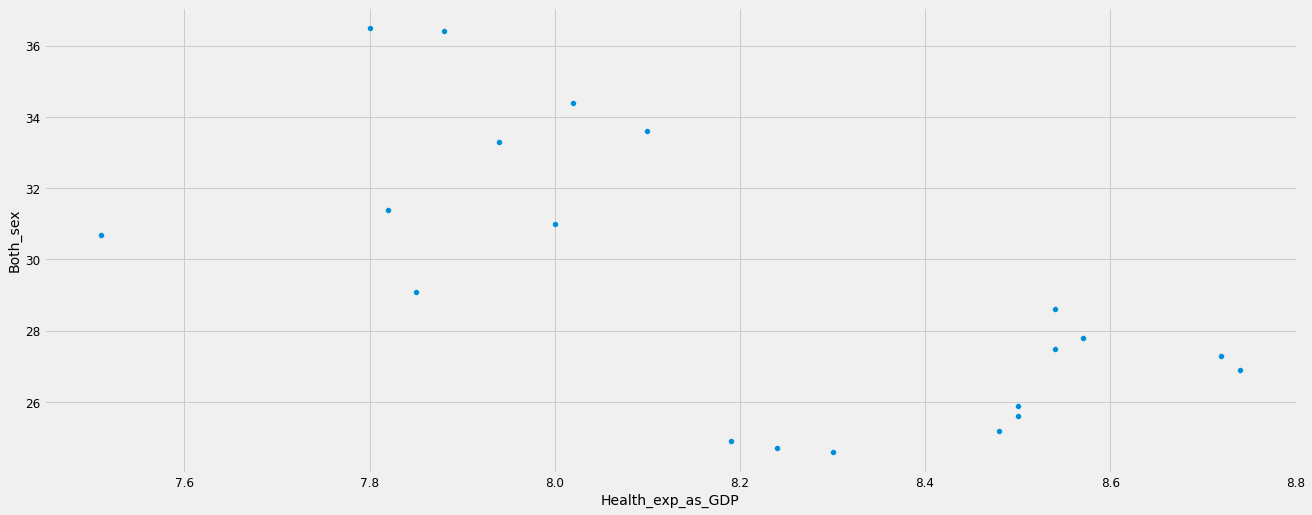

In [502]:
sns.scatterplot(x=slo_he.Health_exp_as_GDP, y=slo.Both_sex)

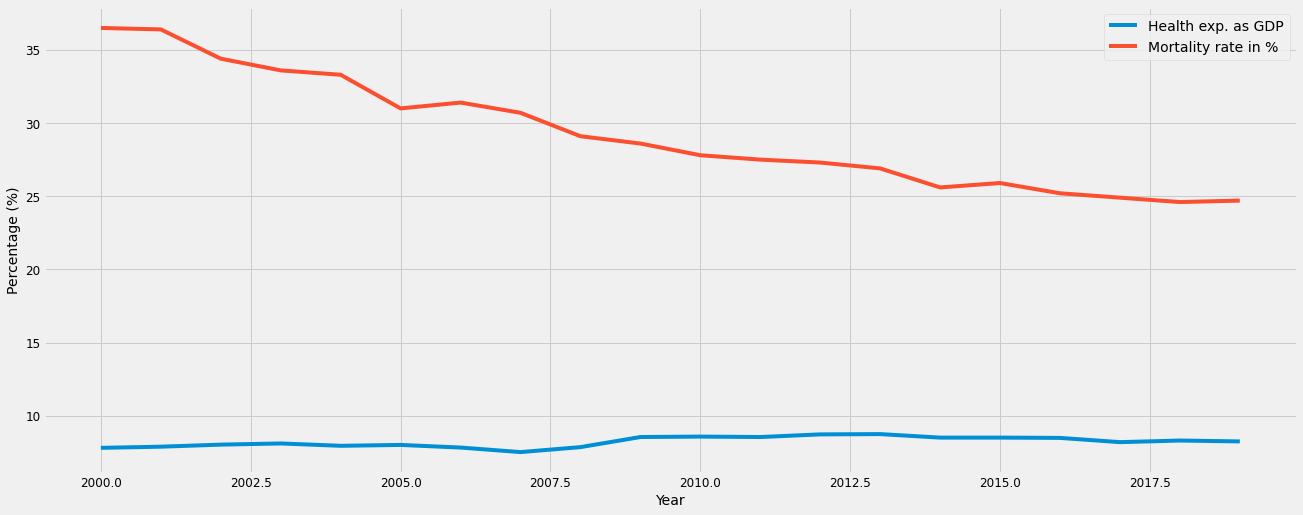

In [321]:
plt.plot(slo_he.Year, slo_he.Health_exp_as_GDP)
plt.plot(slo.Year, slo.Both_sex)
plt.legend(["Health exp. as GDP", "Mortality rate in %"])
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.show()

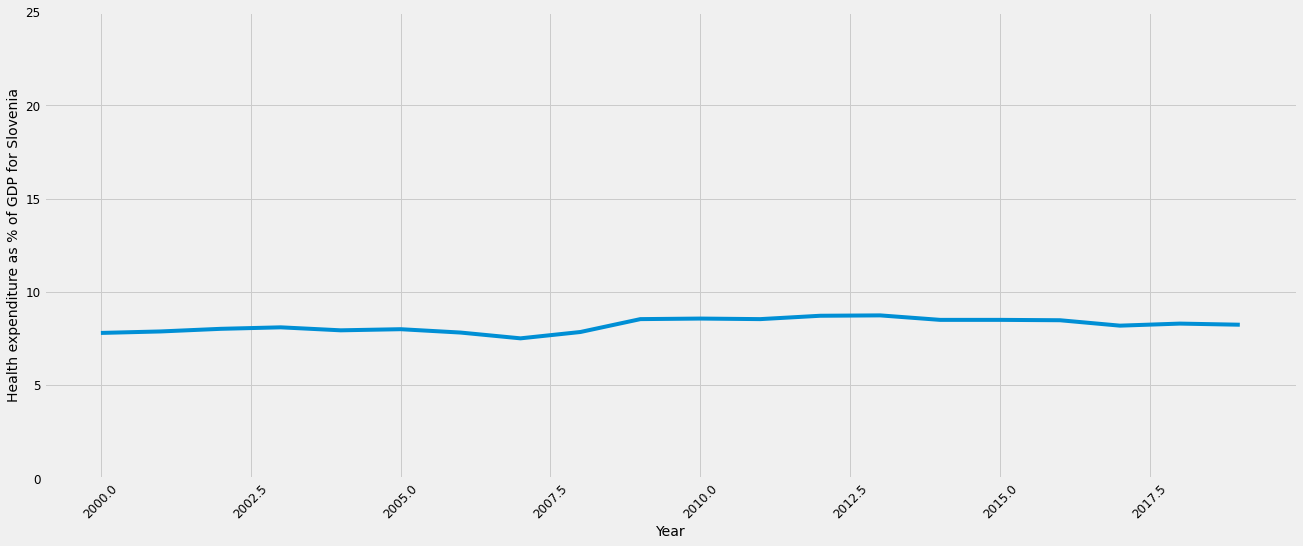

In [311]:
plt.plot(slo_he.Year, slo_he.Health_exp_as_GDP)
plt.xlabel("Year")
plt.ylabel("Health expenditure as % of GDP for Slovenia")
plt.xticks(rotation=45)
plt.ylim([0,25])
plt.show()

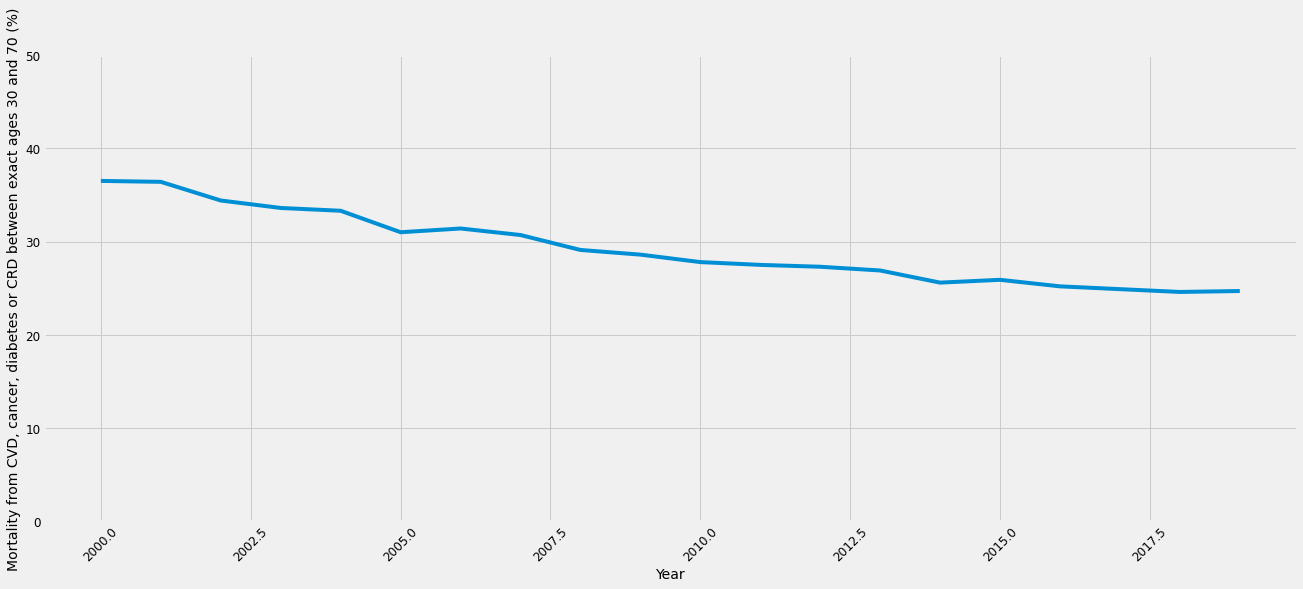

In [310]:
plt.plot(slo.Year, slo.Both_sex)
plt.xlabel("Year")
plt.ylabel("Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)")
plt.ylim([0,50])
plt.xticks(rotation=45)
plt.show()

In [ ]:
#SKUPAJ - vlaganje v zdravstvo GDP, vlaganje v zdravstvo per capita in kako to vpliva na prezgodnje smrti zaradi
#kroničnih obolenj

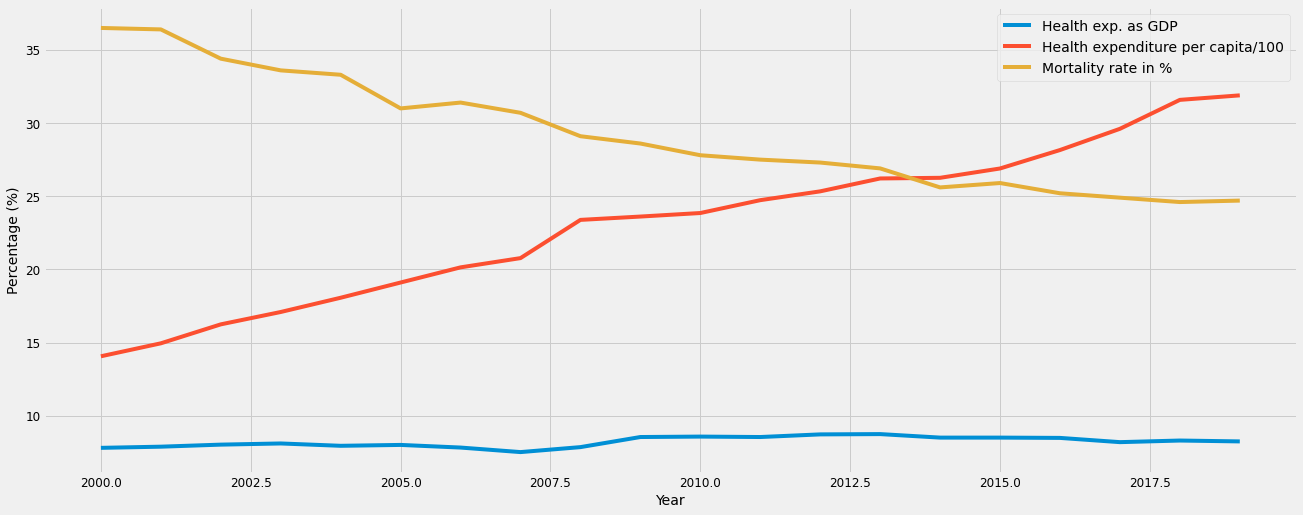

In [322]:
plt.plot(slo_he.Year, slo_he.Health_exp_as_GDP)
plt.plot(he_pc.Year, he_pc.Health_exp_per_capita/100)
plt.plot(slo.Year, slo.Both_sex)
plt.legend(["Health exp. as GDP", "Health expenditure per capita/100", "Mortality rate in %",])
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.show()

In [ ]:
#Vpliv indeksa telesne mase (ITM/BMI) na prezgodnje smrti zaradi kroničnih 
#obolenj (Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%))
#Debelost ali pa nedohranjenost vplivata na kronična obolenja posameznikov. Normalen BMI = [18,5-25]

In [402]:
bmi = pd.read_csv("bmi_data.csv")

In [382]:
bmi

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...",...,"Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e...","Mean BMI (kg/m&amp;#xb2,) (age-standardized e..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,23.4 [22.0-24.8],22.6 [20.1-25.1],24.1 [23.0-25.3],23.3 [21.9-24.6],22.5 [20.1-25.0],24.0 [22.9-25.1],23.2 [21.8-24.5],22.4 [20.0-24.9],23.9 [22.8-24.9],...,19.3 [16.4-22.0],19.2 [17.2-21.1],19.2 [16.6-21.8],19.1 [16.2-22.0],19.0 [17.0-21.0],19.1 [16.5-21.7],19.0 [15.9-22.0],18.9 [16.9-21.0],19.0 [16.3-21.7],18.9 [15.8-21.9]
4,Albania,26.7 [25.8-27.5],27.0 [25.8-28.2],26.3 [25.0-27.6],26.6 [25.8-27.4],26.9 [25.8-28.0],26.2 [25.0-27.4],26.5 [25.8-27.2],26.8 [25.8-27.8],26.1 [25.0-27.3],...,23.9 [21.3-26.4],23.9 [22.3-25.5],23.9 [22.0-25.9],23.8 [21.2-26.5],23.8 [22.1-25.5],23.8 [21.8-25.9],23.8 [21.0-26.6],23.8 [22.0-25.6],23.8 [21.7-26.0],23.8 [20.9-26.6]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Venezuela (Bolivarian Republic of),26.7 [26.2-27.2],26.6 [25.9-27.3],26.8 [26.0-27.5],26.7 [26.2-27.2],26.6 [25.9-27.2],26.7 [26.0-27.5],26.6 [26.2-27.1],26.6 [25.9-27.2],26.7 [26.0-27.4],...,24.2 [21.7-26.8],24.2 [22.6-25.8],24.2 [22.2-26.2],24.1 [21.5-26.8],24.0 [22.4-25.8],24.1 [22.0-26.2],24.0 [21.3-26.8],23.9 [22.2-25.7],24.0 [21.8-26.2],23.9 [21.0-26.7]
194,Viet Nam,21.9 [21.5-22.3],21.9 [21.4-22.5],21.9 [21.3-22.5],21.7 [21.4-22.1],21.8 [21.3-22.2],21.7 [21.2-22.3],21.6 [21.3-21.9],21.6 [21.2-22.0],21.6 [21.1-22.1],...,18.1 [16.9-19.4],18.3 [17.4-19.2],18.6 [17.4-19.9],18.0 [16.7-19.4],18.2 [17.2-19.2],18.5 [17.2-20.0],18.0 [16.5-19.4],18.2 [17.1-19.2],18.5 [17.0-20.0],17.9 [16.3-19.4]
195,Yemen,23.8 [23.1-24.5],23.6 [22.5-24.7],24.1 [23.2-24.9],23.7 [23.1-24.3],23.5 [22.5-24.5],23.9 [23.2-24.7],23.6 [23.1-24.2],23.4 [22.6-24.3],23.8 [23.2-24.5],...,19.6 [17.5-21.6],19.9 [18.4-21.4],20.4 [18.3-22.5],19.5 [17.3-21.6],19.8 [18.2-21.4],20.3 [18.1-22.5],19.4 [17.1-21.6],19.7 [18.0-21.4],20.2 [17.9-22.5],19.2 [16.8-21.6]
196,Zambia,22.6 [21.7-23.4],21.3 [19.8-22.9],23.7 [22.9-24.6],22.5 [21.6-23.3],21.3 [19.8-22.8],23.7 [22.9-24.4],22.4 [21.6-23.2],21.2 [19.8-22.6],23.6 [22.9-24.3],...,20.9 [19.2-22.6],19.8 [18.4-21.2],18.7 [16.6-20.8],20.8 [18.9-22.6],19.6 [18.2-21.1],18.6 [16.3-20.8],20.7 [18.7-22.6],19.5 [18.0-21.1],18.4 [16.1-20.8],20.5 [18.4-22.6]


In [403]:
#bmi_n = bmi.iloc[: , [0, 1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]].copy() 
bmi_nn = bmi.iloc[: , [0, 1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]].copy() 

In [408]:
#bmi_nn = bmi_nn.iloc[3:]
#bmi_nn = bmi_nn.T
#bmi_nn.iloc[0] = bmi.loc[:,"Unnamed 0"]
#bmi_nn.rename(columns = {"Unnamed: 0": 'Year_Con'}, inplace = True)
bmi_nn

,Year_Con,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
3,Afghanistan,23.4 [22.0-24.8],23.3 [21.9-24.6],23.2 [21.8-24.5],23.0 [21.7-24.4],22.9 [21.6-24.3],22.8 [21.6-24.1],22.7 [21.5-24.0],22.6 [21.4-23.9],22.5 [21.3-23.8],22.4 [21.2-23.7],22.3 [21.1-23.6],22.2 [21.0-23.5],22.1 [20.9-23.4],22.0 [20.7-23.3],21.9 [20.6-23.2],21.8 [20.5-23.2],21.7 [20.4-23.1]
4,Albania,26.7 [25.8-27.5],26.6 [25.8-27.4],26.5 [25.8-27.2],26.4 [25.7-27.1],26.3 [25.6-26.9],26.2 [25.6-26.8],26.1 [25.5-26.7],26.0 [25.5-26.5],25.9 [25.4-26.4],25.8 [25.3-26.3],25.7 [25.2-26.2],25.6 [25.1-26.2],25.5 [24.9-26.1],25.4 [24.8-26.0],25.3 [24.7-25.9],25.2 [24.6-25.9],25.2 [24.5-25.8]
5,Algeria,25.5 [24.5-26.5],25.5 [24.5-26.4],25.4 [24.5-26.2],25.3 [24.5-26.1],25.2 [24.5-26.0],25.1 [24.4-25.8],25.1 [24.4-25.7],25.0 [24.4-25.6],24.9 [24.3-25.5],24.8 [24.3-25.4],24.7 [24.2-25.3],24.7 [24.2-25.2],24.6 [24.1-25.1],24.5 [24.0-25.1],24.4 [23.9-25.0],24.4 [23.8-24.9],24.3 [23.7-24.9]
6,Andorra,26.7 [24.6-28.7],26.7 [24.7-28.7],26.7 [24.7-28.7],26.8 [24.8-28.7],26.8 [24.8-28.7],26.8 [24.9-28.7],26.8 [24.9-28.7],26.8 [25.0-28.7],26.8 [25.0-28.7],26.8 [25.0-28.6],26.8 [25.0-28.6],26.8 [25.0-28.6],26.8 [24.9-28.6],26.8 [24.9-28.5],26.7 [24.9-28.5],26.7 [24.9-28.5],26.7 [24.8-28.4]
7,Angola,23.3 [21.2-25.6],23.2 [21.1-25.4],23.2 [21.1-25.3],23.1 [21.0-25.2],23.0 [21.0-25.0],22.9 [20.9-24.9],22.8 [20.8-24.8],22.7 [20.7-24.7],22.6 [20.6-24.5],22.5 [20.6-24.4],22.4 [20.5-24.3],22.3 [20.4-24.2],22.2 [20.3-24.1],22.0 [20.1-23.9],21.9 [20.0-23.8],21.8 [19.9-23.7],21.7 [19.8-23.6]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Venezuela (Bolivarian Republic of),26.7 [26.2-27.2],26.7 [26.2-27.2],26.6 [26.2-27.1],26.6 [26.2-27.1],26.6 [26.2-27.1],26.6 [26.1-27.0],26.6 [26.1-27.0],26.6 [26.1-27.0],26.5 [26.1-27.0],26.5 [26.1-27.0],26.5 [26.0-26.9],26.5 [26.0-26.9],26.4 [25.9-26.9],26.4 [25.9-26.9],26.3 [25.8-26.9],26.3 [25.7-26.8],26.2 [25.6-26.8]
194,Viet Nam,21.9 [21.5-22.3],21.7 [21.4-22.1],21.6 [21.3-21.9],21.5 [21.2-21.7],21.3 [21.1-21.6],21.2 [20.9-21.4],21.0 [20.8-21.3],20.9 [20.7-21.1],20.8 [20.6-21.0],20.7 [20.5-20.9],20.6 [20.3-20.8],20.4 [20.2-20.7],20.3 [20.1-20.5],20.2 [20.0-20.4],20.1 [19.9-20.4],20.0 [19.8-20.3],19.9 [19.7-20.2]
195,Yemen,23.8 [23.1-24.5],23.7 [23.1-24.3],23.6 [23.1-24.2],23.5 [23.1-24.0],23.4 [23.0-23.9],23.4 [23.0-23.8],23.3 [22.9-23.6],23.2 [22.8-23.5],23.1 [22.8-23.4],23.0 [22.7-23.3],22.9 [22.6-23.2],22.8 [22.5-23.1],22.7 [22.4-23.1],22.6 [22.3-23.0],22.5 [22.1-22.9],22.4 [22.0-22.9],22.3 [21.9-22.8]
196,Zambia,22.6 [21.7-23.4],22.5 [21.6-23.3],22.4 [21.6-23.2],22.4 [21.6-23.1],22.3 [21.6-23.0],22.2 [21.6-22.9],22.2 [21.5-22.8],22.1 [21.5-22.7],22.0 [21.4-22.6],22.0 [21.4-22.6],21.9 [21.3-22.5],21.8 [21.2-22.4],21.8 [21.2-22.4],21.7 [21.1-22.3],21.6 [21.1-22.2],21.6 [21.0-22.2],21.5 [20.9-22.2]


In [458]:
bmi_nn_slo = bmi_nn[bmi_nn.Year_Con == "Slovenia"]

In [460]:
#bmi_nn_slo.set_index('Year_Con',inplace=True)
bmi_nn_slo = bmi_nn_slo.T

In [473]:
bmi_nn_slo["BMI_SVN"] = bmi_nn_slo["Slovenia"].str[0:4]

In [475]:
del bmi_nn_slo["Slovenia"]

In [482]:
#bmi_nn_slo = bmi_nn_slo.reset_index()
#bmi_nn_slo.columns
#bmi_nn_slo.rename(columns = {"index": 'Year'}, inplace = True)
#bmi_nn_slo.index.name = None
bmi_nn_slo.dtypes

Year_Con
Year         int64
BMI_SVN    float64
dtype: object

In [463]:
new_header = bmi_nn_slo.iloc[0] #grab the first row for the header
bmi_nn_slo = bmi_nn_slo[1:] #take the data less the header row
bmi_nn_slo.columns = new_header #set the header row as the df header

In [481]:
bmi_nn_slo["Year"] = bmi_nn_slo["Year"].astype(int)
bmi_nn_slo["BMI_SVN"] = bmi_nn_slo["BMI_SVN"].astype(float)

In [483]:
bmi_nn_slo

Year_Con,Year,BMI_SVN
0,2016,26.6
1,2015,26.5
2,2014,26.4
3,2013,26.3
4,2012,26.2
5,2011,26.2
6,2010,26.1
7,2009,26.0
8,2008,25.9
9,2007,25.9


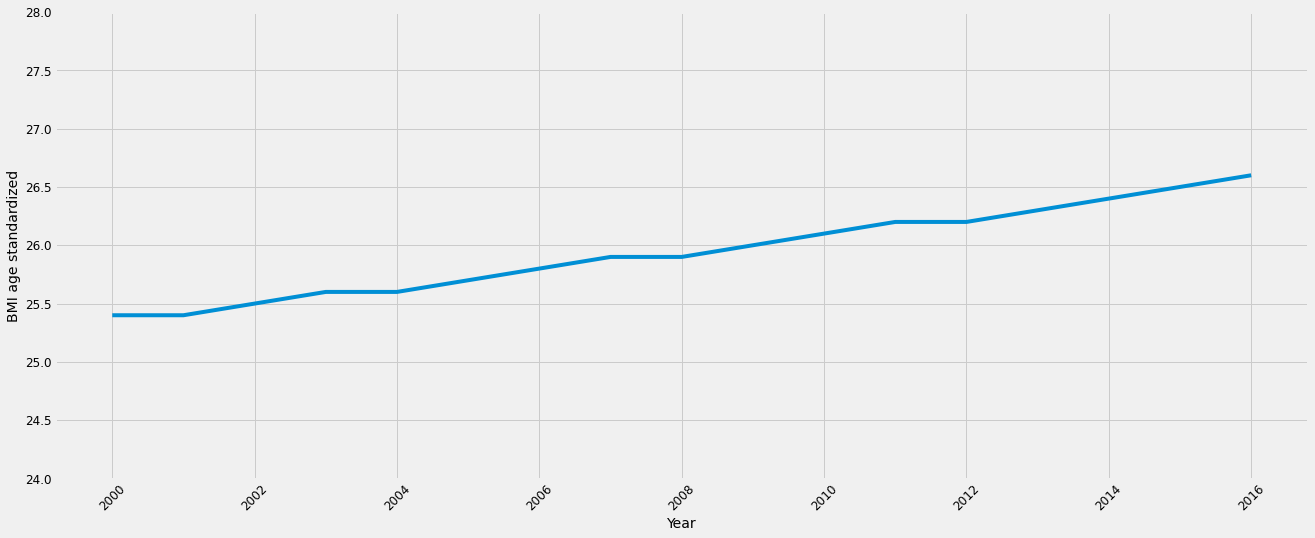

In [492]:
plt.plot(bmi_nn_slo.Year, bmi_nn_slo.BMI_SVN)
plt.xlabel("Year")
plt.ylabel("BMI age standardized")
plt.xticks(rotation=45)
plt.ylim([24,28])
plt.show()

In [499]:
#SKUPAJ - BMI vpliv na prezgodnje smrti zaradi kroničnih obolenj

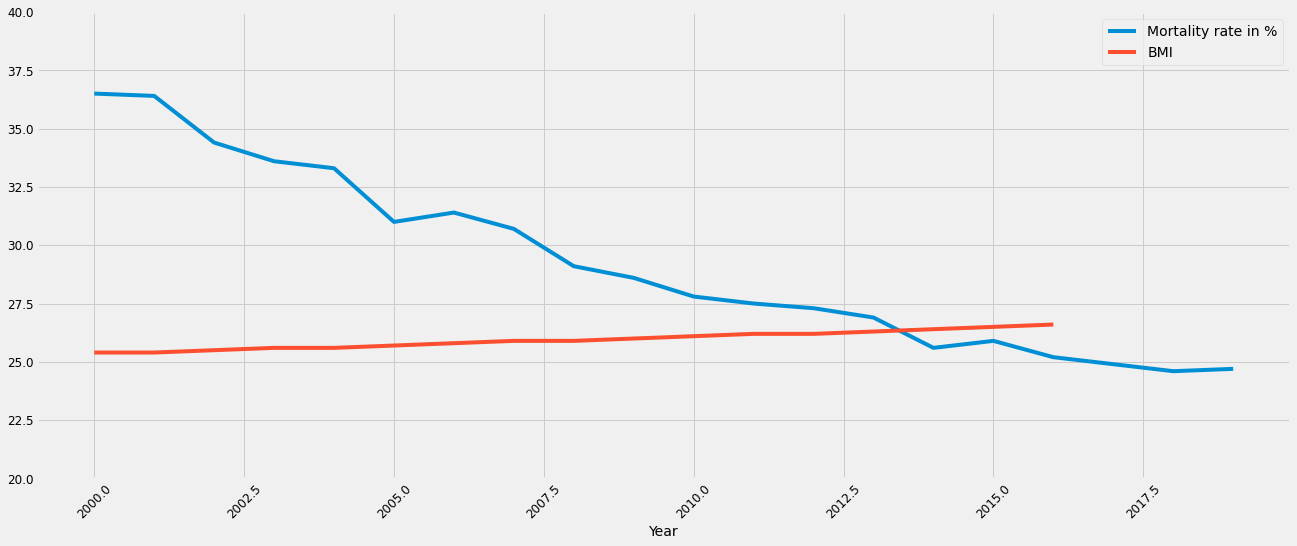

In [498]:
plt.plot(slo.Year, slo.Both_sex)
plt.plot(bmi_nn_slo.Year, bmi_nn_slo.BMI_SVN)
plt.legend(["Mortality rate in %", "BMI",])
plt.xlabel("Year")
plt.ylim([20,40])
plt.xticks(rotation=45)
plt.show()